In [24]:
import json
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import math




In [33]:
f = open('/Users/USER/Downloads/part-4db36962-5437-4b9e-80ef-b8ad5629cf82')
# f1 = open('/Users/USER/Downloads/part-4cac2a82-add0-41ae-867e-11501c1d81df')    
jsonList = []
for line in f:
    print(line)
    jsonList.append(json.loads(line))

for i in jsonList:
    print(i["custom_params"]["score"])

{"name":"PlayerData","ts":1634601299932,"userid":"aac4bb2d4018c425b9227fc25148da59","sessionid":"2611971213490538121","platform":"OSXEditor","sdk_ver":"u2020.3.17f1","debug_device":true,"user_agent":"UnityPlayer/2020.3.17f1 (UnityWebRequest/1.0, libcurl/7.75.0-DEV)","submit_time":1634602724000,"custom_params":{"lasers":"1","height_score":"49","score":"49","defuff":"5","total_laser_damage":"100","health":"1151.0","failWay":"fall out","hooks":"0","buff":"1"},"country":"US","city":"Los Angeles","appid":"f196703e-9bf1-4465-824c-bb7767c129b2","type":"custom"}

{"name":"PlayerData","ts":1634658308559,"userid":"952cf47957d594eafb0a221e3ccdb67b","sessionid":"4271406436765774020","platform":"OSXEditor","sdk_ver":"u2020.3.17f1","debug_device":true,"user_agent":"UnityPlayer/2020.3.17f1 (UnityWebRequest/1.0, libcurl/7.75.0-DEV)","submit_time":1634665233000,"custom_params":{"lasers":"0","height_score":"73","score":"7","defuff":"0","total_laser_damage":"0","health":"109.0","failWay":"fall out","hook

JSONDecodeError: Expecting value: line 2 column 1 (char 1)

In [34]:
print(jsonList)

[{'name': 'PlayerData', 'ts': 1634601299932, 'userid': 'aac4bb2d4018c425b9227fc25148da59', 'sessionid': '2611971213490538121', 'platform': 'OSXEditor', 'sdk_ver': 'u2020.3.17f1', 'debug_device': True, 'user_agent': 'UnityPlayer/2020.3.17f1 (UnityWebRequest/1.0, libcurl/7.75.0-DEV)', 'submit_time': 1634602724000, 'custom_params': {'lasers': '1', 'height_score': '49', 'score': '49', 'defuff': '5', 'total_laser_damage': '100', 'health': '1151.0', 'failWay': 'fall out', 'hooks': '0', 'buff': '1'}, 'country': 'US', 'city': 'Los Angeles', 'appid': 'f196703e-9bf1-4465-824c-bb7767c129b2', 'type': 'custom'}, {'name': 'PlayerData', 'ts': 1634658308559, 'userid': '952cf47957d594eafb0a221e3ccdb67b', 'sessionid': '4271406436765774020', 'platform': 'OSXEditor', 'sdk_ver': 'u2020.3.17f1', 'debug_device': True, 'user_agent': 'UnityPlayer/2020.3.17f1 (UnityWebRequest/1.0, libcurl/7.75.0-DEV)', 'submit_time': 1634665233000, 'custom_params': {'lasers': '0', 'height_score': '73', 'score': '7', 'defuff': '

{'aac4bb2d4018c425b9227fc25148da59': [17, 1], '952cf47957d594eafb0a221e3ccdb67b': [19, 1], 'ebb957feecbe24252887783c620c3e87': [133, 1], '27eeff0abb266844c8c602b66bfed183': [129, 1], 'aaf90f8d927ff4def8135ed061d325f9': [13, 1], 'f2abfe8336f5f48919ac05c2e5197271': [23, 1], 'eaf06758cab0695be9de595e316846c5': [0, 1], 'fb4f1fa6f30644a64968334e51329b32': [32, 1], '09eaaf2c1b540f9d69ef1f85d763a132': [0, 1]}
{'aac4bb2d4018c425b9227fc25148da59': 8, '952cf47957d594eafb0a221e3ccdb67b': 14, 'ebb957feecbe24252887783c620c3e87': 8, '27eeff0abb266844c8c602b66bfed183': 16, 'aaf90f8d927ff4def8135ed061d325f9': 14, 'f2abfe8336f5f48919ac05c2e5197271': 3, 'eaf06758cab0695be9de595e316846c5': 2, 'fb4f1fa6f30644a64968334e51329b32': 5, '09eaaf2c1b540f9d69ef1f85d763a132': 1}
0
0 1
0
0 2
17
1 1
19
1 2
13
1 3
23
2 1
32
3 1
129
12 1
133
13 1
[2, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
231


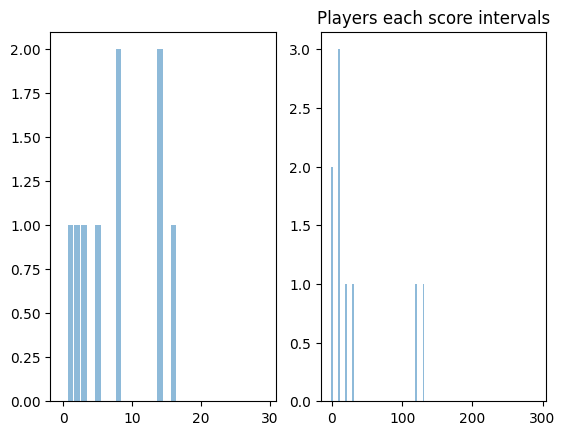

In [37]:
scoreInterval = np.arange(0,300,10)
performance = [0 for _ in scoreInterval] #y axis of the score interval

Dict = {}#key: player's name value: their average score and the count of their score
PlayerGame = {}#how many games a player plays

maxScore = -math.inf

for i in jsonList:
    if i["userid"] not in Dict:
        Dict[i["userid"]]=[int(i["custom_params"]["score"]),1]
    else:
        Dict[i["userid"]][0] += int(i["custom_params"]["score"])
        Dict[i["userid"]][1] += 1
        Dict[i["userid"]][0] = Dict[i["userid"]][0]//Dict[i["userid"]][1]
        Dict[i["userid"]][1] = 1
        if int(i["custom_params"]["score"]) > maxScore:
            maxScore = int(i["custom_params"]["score"])
    if i["userid"] not in PlayerGame:
        PlayerGame[i["userid"]] = 1
    else:
        PlayerGame[i["userid"]] += 1
#x would be the number of game plays
#y would be the number of the players
#         sessions = [0 for _ in range(len(Dict))]
print(Dict)
print(PlayerGame)
numberOfGames = np.arange(0,30)#number of games a player plays
numberOfPlayerGame = [0 for _ in range(len(numberOfGames))]#the number of the players who plays the number of the game
for ind in range(len(numberOfGames)-1):
    for key, val in PlayerGame.items():
        if ind == PlayerGame[key]:#if the number of the game equal to the number of the game a player playes
            numberOfPlayerGame[ind] += 1 #shows in the y axis
# print(numberOfPlayerGame)            
plt.subplot(1, 2, 1)
# plt.title('number of game each player plays')
plt.bar(numberOfGames,numberOfPlayerGame, align='center', alpha=0.5)
            

for ind in range(len(scoreInterval)-1):
    for key,val in Dict.items():
        if val[0] < scoreInterval[ind+1] and val[0] >= scoreInterval[ind]:
            print(val[0])
            performance[ind] += 1
            print(ind, performance[ind])
#             print(y_pos[ind],y_pos[ind+1])
        
print(performance)
plt.subplot(1, 2, 2)
plt.bar(scoreInterval, performance, align='center', alpha=0.5, width=2)
# plt.xticks(y_pos)
# plt.ylabel("Number of Users")
plt.title('Players each score intervals')

# plt.show()
print(maxScore)